In [1]:
# Requirements
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import PyQt5 as qt
import copy 
import math

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score

pd.set_option('display.colheader_justify', 'center')
np.set_printoptions(suppress=True, precision=3)
sns.set_theme()

In [ ]:
# Logistic function
def logistic_funct(X1, X2, b0, b1, b2):
    odds = np.exp(b0 + b1*X1 + b2*X2) / \
      (1 + np.exp(b0 + b1*X1 + b2*X2))
    
    return np.array(odds)

## Data Preparation

In [3]:
# Reading the data and creating a copy
df_main = pd.read_csv('binary_train_dataset.csv')
df = copy.deepcopy(df_main)
df.head()

,SAT,Admitted,Gender
0,1363,No,Male
1,1792,Yes,Female
2,1954,Yes,Female
3,1653,No,Male
4,1593,No,Male


In [ ]:
# Mapping the values 
df['Admitted'] = df['Admitted'].map({'Yes':1,'No':0})
df['Gender']   = df['Gender'].map({'Female':1,'Male':0})
df.head()

,SAT,Admitted,Gender
0,1363,0,0
1,1792,1,1
2,1954,1,1
3,1653,0,0
4,1593,0,0


In [5]:
df.dtypes

SAT         int64
Admitted    int64
Gender      int64
dtype: object

In [6]:
# Dividing the features from the target variables
y = df['Admitted']
X = df.drop(['Admitted'], axis=1)

In [7]:
# Splitting the data into train dataset and test dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Logistic Regression using Scikit-Learn

## Modeling

In [8]:
# Training the model
log_reg_sk = LogisticRegression()
log_reg_sk.fit(X_train, y_train)

LogisticRegression()

## Evaluation

In [9]:
# Prediction (Integer)
y_hat_sk = log_reg_sk.predict(X_test)
# Prediction (Probability:Float)
y_hat_sk_proba = log_reg_sk.predict_proba(X_test)

In [10]:
# Confusion matrix
conf_matrix_sk = confusion_matrix(y_test,y_hat_sk)
# Accuracy score
acc_score_sk = accuracy_score(y_test, y_hat_sk)
# Classification rate
classification_rate_sk = math.floor(acc_score_sk*100)
# Misclassification rate
misclassification_rate_sk = abs(classification_rate_sk-100)

In [ ]:
# Confusion matrix dataframe
conf_matrix_sk_df = pd.DataFrame(
    data    = conf_matrix_sk,
    columns = ['Predicted Non-Admitted', 'Predicted Admitted'],
    index   = ['Actual Non-Admitted', 'Actual Admitted']
)

print(f"\n-------- Confusion Matrix: Logistic Regression: Scikit-Learn --------\n")
print(conf_matrix_sk_df)


-------- Confusion Matrix: Logistic Regression: Scikit-Learn --------

                     Predicted Non-Admitted  Predicted Admitted
Actual Non-Admitted             9                     3        
Actual Admitted                 0                    22        


In [ ]:
# Accuracy dataframe
accuracy_dict_sk = {
    "classification_rate"    : [classification_rate_sk],
    "misclassification_rate" : [misclassification_rate_sk]
}

accuracy_df_sk = pd.DataFrame.from_dict(data = accuracy_dict_sk)

print(f"\n-------- Accuracy: Logistic Regression: Scikit-Learn --------\n")
print(accuracy_df_sk)


-------- Accuracy: Logistic Regression: Scikit-Learn --------

   classification_rate  misclassification_rate
0          91                      9          


# Logistic Regression Using Statsmodels

## Modeling

In [13]:
# Adding a constant (B0)
X_train_const = sm.add_constant(X_train)

In [14]:
# Training the model
log_reg_sm = sm.Logit(y_train, X_train_const)
log_reg_sm = log_reg_sm.fit()

Optimization terminated successfully.
         Current function value: 0.119533
         Iterations 10


In [15]:
# Statistics
log_reg_sm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Admitted   No. Observations:                  134
Model:                          Logit   Df Residuals:                      131
Method:                           MLE   Df Model:                            2
Date:                Tue, 14 Jan 2025   Pseudo R-squ.:                  0.8269
Time:                        18:07:46   Log-Likelihood:                -16.017
converged:                       True   LL-Null:                       -92.508
Covariance Type:            nonrobust   LLR p-value:                 6.032e-34
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -68.4855     18.076     -3.789      0.000    -103.915     -33.056
SAT            0.0408      0.011      3.767      0.000       0.020       0.062
Gender         2.0074      0.973      2.064      0.039       0.101       3.913
==============================================================================

Possibly complete quasi-separation: A fraction 0.28 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [16]:
# Coefficients/Weights to set up the logistic function
log_reg_sm.params

const    -68.485509
SAT        0.040838
Gender     2.007392
dtype: float64

## Evaluation

In [17]:
# Setting up the values for the logistic function
X1 = X_test["SAT"]
X2 = X_test["Gender"]
b0 = log_reg_sm.params.iloc[0]
b1 = log_reg_sm.params.iloc[1]
b2 = log_reg_sm.params.iloc[2]

In [18]:
# Predictions
y_hat_sm_proba = logistic_funct(X1, X2, b0, b1, b2)
y_hat_sm = np.round(y_hat_sm_proba, decimals=0).astype(int)

In [19]:
# Confusion matrix
conf_matrix_sm = confusion_matrix(y_test,y_hat_sm)
# Accuracy score
acc_score_sm = accuracy_score(y_test, y_hat_sm)
# Classification rate
classification_rate_sm = math.floor(acc_score_sm*100)
# Misclassification rate
misclassification_rate_sm = abs(classification_rate_sm - 100)

In [ ]:
# Confusion matrix dataframe
conf_matrix_sm_df = pd.DataFrame(
    data    = conf_matrix_sm,
    columns = ['Predicted Non-Admitted', 'Predicted Admitted'],
    index   = ['Actual Non-Admitted', 'Actual Admitted']
)

print(f"\n-------- Confusion Matrix for Logistic Regression: StatsModel --------\n")
print(conf_matrix_sm_df)


-------- Confusion Matrix for Logistic Regression: StatsModel --------

                     Predicted Non-Admitted  Predicted Admitted
Actual Non-Admitted            10                     2        
Actual Admitted                 0                    22        


In [ ]:
# Accuracy dataframe
accuracy_dict_sm = {
    "classification_rate"    : [classification_rate_sm],
    "misclassification_rate" : [misclassification_rate_sm]
}

accuracy_df_sm = pd.DataFrame.from_dict(data = accuracy_dict_sm)

print(f"\n-------- Accuracy Logistic Regression: StatsModel --------\n")
print(accuracy_df_sm)


-------- Accuracy Logistic Regression: StatsModel --------

   classification_rate  misclassification_rate
0          94                      6          


# Comparing: Scikit-Learn vs Statsmodels

## Accuracy

In [22]:
# Accuracy dataframe Scikitlearn vs Statsmodels 
accuracy_dict = {
    "classification_rate"    : [classification_rate_sk, classification_rate_sm],
    "misclassification_rate" : [misclassification_rate_sk, misclassification_rate_sm]
}

accuracy_df = pd.DataFrame(
    data  = accuracy_dict,
    index = ["Scitkit-Learn", "Statsmodel"]
).sort_values(by="classification_rate", ascending=False)

print(f"\n-------- Accuracy: Scikit-Learn vs StatsModel --------\n")
accuracy_df


-------- Accuracy: Scikit-Learn vs StatsModel --------



,classification_rate,misclassification_rate
Statsmodel,94,6
Scitkit-Learn,91,9


## Predictions

In [23]:
# Predictions dataframe Scikitlearn vs Statsmodels 
prediction_dict = {
    "SAT"           : X_test["SAT"],
    "Gender"        : X_test["Gender"],
    "Admitted"      : y_test,
    "sk_prediction" : y_hat_sk,
    "sm_prediction" : y_hat_sm
}

prediction_df = pd.DataFrame(data = prediction_dict).reset_index(drop=True)

In [24]:
# Styling function
def highlight_mismatch(column):
    """
    Highlights cells in red where the value in the current column 
    does not match the corresponding value in another column.

    Returns:
        A list of CSS styles, where 'background-color: red' is applied 
        to cells where the values don't match.
    """
    # Compare current column with 'Admitted'. Returns "True/False" per row
    is_match = (column == prediction_df['Admitted'])  
    
    return ["background-color: green" if match 
            else "background-color: red" 
            for match in is_match
    ]

In [25]:
# Predictions dataframe (Styled)
prediction_df.style.apply(
    func   = highlight_mismatch, 
    subset = ['sk_prediction', "sm_prediction"]
)

,SAT,Gender,Admitted,sk_prediction,sm_prediction
0,1587,0,0,0,0
1,1962,1,1,1,1
2,1593,0,0,0,0
3,1402,0,0,0,0
4,1721,1,1,1,1
5,1880,1,1,1,1
6,1907,1,1,1,1
7,1855,1,1,1,1
8,2021,1,1,1,1
9,1693,0,0,1,1


## Probability Graph

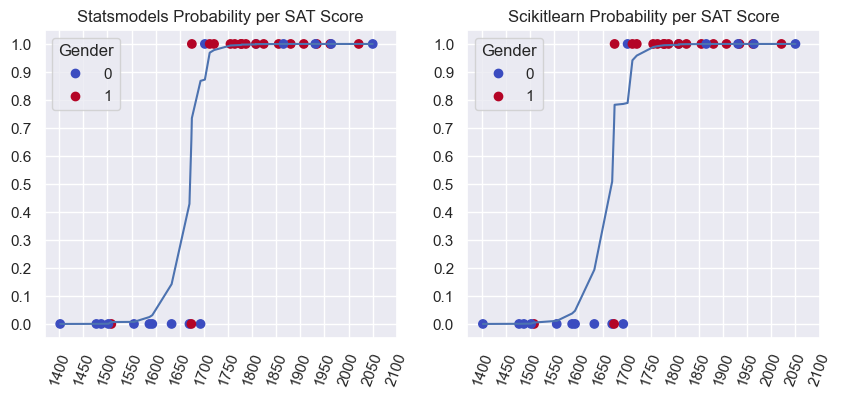

In [26]:
fig, ax = plt.subplots(1,2, figsize=(10, 4))

# Subplot [1,1]
title_11 =       ax[0].set_title("Statsmodels Probability per SAT Score")
scatterplot_11 = ax[0].scatter(y=y_test, x=X_test['SAT'], c=X_test["Gender"], cmap="coolwarm")
lineplot_11 =    ax[0].plot(np.sort(X_test['SAT']),np.sort(y_hat_sm_proba))
xticks_11 =      ax[0].set_xticks([1400,1450,1500,1550,1600,1650,1700,1750,1800,1850,1900,1950,2000,2050,2100])
yticks_11 =      ax[0].set_yticks([0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1])
xlabels_rot_11 = ax[0].tick_params(axis='x', labelrotation=70) 

# Subplot [2,1]
title_21 =       ax[1].set_title("Scikitlearn Probability per SAT Score")
scatterplot_21 = ax[1].scatter(y=y_test, x=X_test['SAT'], c=X_test["Gender"], cmap="coolwarm")
lineplot_21 =    ax[1].plot(np.sort(X_test['SAT']),np.sort(y_hat_sk_proba[:,1]))
xticks_21 =      ax[1].set_xticks([1400,1450,1500,1550,1600,1650,1700,1750,1800,1850,1900,1950,2000,2050,2100])
xlabels_rot_21 = ax[1].tick_params(axis='x', labelrotation=70) 
yticks_21 =      ax[1].set_yticks([0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1])

# Legend for both subplots
legend_handles_11, unique_labels_11 = scatterplot_11.legend_elements()
legend_ax1 =     ax[1].legend(handles=legend_handles_11, labels=unique_labels_11, title="Gender")
legend_ax0 =     ax[0].legend(handles=legend_handles_11, labels=unique_labels_11, title="Gender")